In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd 
import math
import random as rnd

def perc2pixels_x(perc):
    return str(width *perc /100);

def perc2pixels_y(perc):
    return str(height *perc /100);

def avg_perc(perc):
    return (float(perc2pixels_x(perc)) + float(perc2pixels_y(perc))) * 0.5

def spike_arc(ra = 12, ra_factor = 3, arc_degree = 100, n_points = 10, random_factor = 0, center_x = 50, center_y = 50, use_pixels = False):            
    step = math.radians(arc_degree) / (n_points - 1)
    start_degree = -arc_degree * 0.5 - 90
    if(not use_pixels):
        ra = avg_perc(ra) 
        ra_factor = avg_perc(3)
        center_x = float(perc2pixels_x(center_x))
        center_y = float(perc2pixels_y(center_y))
    def angled_point(radius):              
        cx = center_x + radius * math.cos(math.radians(start_degree) + i * step)
        cy = center_y + radius * math.sin(math.radians(start_degree) + i * step)
        return cx, cy
    path_tower = ""
    for i in range(n_points):
        cx_l, cy_l = angled_point(ra + ra_factor * rnd.random() * random_factor)
        cx_h, cy_h = angled_point(ra + ra_factor + ra_factor * rnd.random() * random_factor)
        if (i == 0):
            path_tower += '<path d="M'+str(cx_l)+' '+str(cy_l)
        if (i % 2 == 0):
            path_tower +=' L'+str(cx_l)+' '+str(cy_l)
            path_tower +=' L'+str(cx_h)+' '+str(cy_h)
        else:
            path_tower +=' L'+str(cx_h)+' '+str(cy_h)
            path_tower +=' L'+str(cx_l)+' '+str(cy_l)

    path_tower += ' " stroke="green" stroke-width="1" fill="none"/>'
    return path_tower

def GenerateColor():
    def getRndInteger(min, max): 
        return math.floor(rnd.random() * (max - min + 1) ) + min;
    lastOne = 0;
    for i in range(getRndInteger(1, 5)):
        #Try to get bright colors by keeping one component in zero and other in one
        toOne = getRndInteger(0, 2);       
        lastOne = toOne = (toOne + 1) % 3 if toOne == lastOne else toOne        
        toZero  = getRndInteger(0, 2)
        toZero = (toZero + 1) % 3 if toZero == toOne else toZero
        toRand = getRndInteger(0, 4) / 4.0
        r = int((1.0 if toOne == 0 else ( 0 if toZero == 0 else toRand)) * 255)
        g = int(1.0 if toOne == 1 else ( 0 if toZero == 1 else toRand)  * 255)
        b = int(1.0 if toOne == 2 else ( 0 if toZero == 2 else toRand) * 255)
    return (r, g, b)

def item_network(id, position_x, position_y, mask_path, figure_svg, begin_anim = 0):
    SVGx = '<g id="'+id+'" transform="translate('+position_x+' '+position_y+') scale(1 1)">'
    #declare mask
    SVGx += '<mask id="'+id+'mask">'
    SVGx += '<circle cx="20" cy="30" r="50" fill="white" />'
    SVGx += mask_path
    SVGx += '</mask>'    
    SVGx += figure_svg
    #put mask
    SVGx += ('<circle cx="20" cy="30" r="40" mask="url(#'+id+'mask)" fill="yellow"> '+
             ' <animate attributename="r" values="40;45;40" begin="'+str(begin_anim)+'s" dur="2s" repeatCount="indefinite" /> '+
             ' </circle> ')
    SVGx += '</g>'
    return SVGx

#https://stackoverflow.com/questions/49091970/how-to-make-a-spiral-in-svg
def spiral_svg():    
    return ('<path transform="translate(-15 -20) scale(0.1 0.1)"  stroke-dashoffset="6265" stroke-dasharray="6265" d="m351 487c0 8-11 4-14-1-6-11 4-24 15-27 19-5 37 11 40 30 4 27-18 50-44 53-35 4-64-25-66-59-3-42 32-77 73-79 50-3 90 39 92 88 2 57-46 104-102 105-65 2-117-53-119-117-1-72 60-131 131-132 80-1 144 67 145 146 1 87-74 158-160 158-95 0-171-81-171-175 0-102 88-185 190-184 110 1 198 95 197 204C557 615 456 709 340 708 215 706 115 598 117 475 119 342 233 236 364 238 504 240 616 361 614 500 611 648 484 766 337 763 182 760 58 626 61 472 65 309 206 179 367 183c170 4 306 151 302 320-4 178-158 319-335 315" style="fill:none;stroke:#000" stroke-width="40">'+
             '<animate attributeName="stroke-dashoffset" values="4000;0;4000;0;4000" dur="15s" fill="freeze" repeatCount="indefinite"/> '+
             '</path>')

#https://fontawesomeicons.com/svg/icons/puzzle-piece
def puzzle_svg():
    return ('<path d="M512 288c0 35.35-21.49 64-48 64c-32.43 0-31.72-32-55.64-32C394.9 320 384 330.9 384 344.4V480c0 17.67-14.33 32-32 32h-71.64C266.9 512 256 501.1 256 487.6C256 463.1 288 464.4 288 432c0-26.51-28.65-48-64-48s-64 21.49-64 48c0 32.43 32 31.72 32 55.64C192 501.1 181.1 512 167.6 512H32c-17.67 0-32-14.33-32-32v-135.6C0 330.9 10.91 320 24.36 320C48.05 320 47.6 352 80 352C106.5 352 128 323.3 128 288S106.5 223.1 80 223.1c-32.43 0-31.72 32-55.64 32C10.91 255.1 0 245.1 0 231.6v-71.64c0-17.67 14.33-31.1 32-31.1h135.6C181.1 127.1 192 117.1 192 103.6c0-23.69-32-23.24-32-55.64c0-26.51 28.65-47.1 64-47.1s64 21.49 64 47.1c0 32.43-32 31.72-32 55.64c0 13.45 10.91 24.36 24.36 24.36H352c17.67 0 32 14.33 32 31.1v71.64c0 13.45 10.91 24.36 24.36 24.36c23.69 0 23.24-32 55.64-32C490.5 223.1 512 252.7 512 288z" '+
            'fill="black" />')



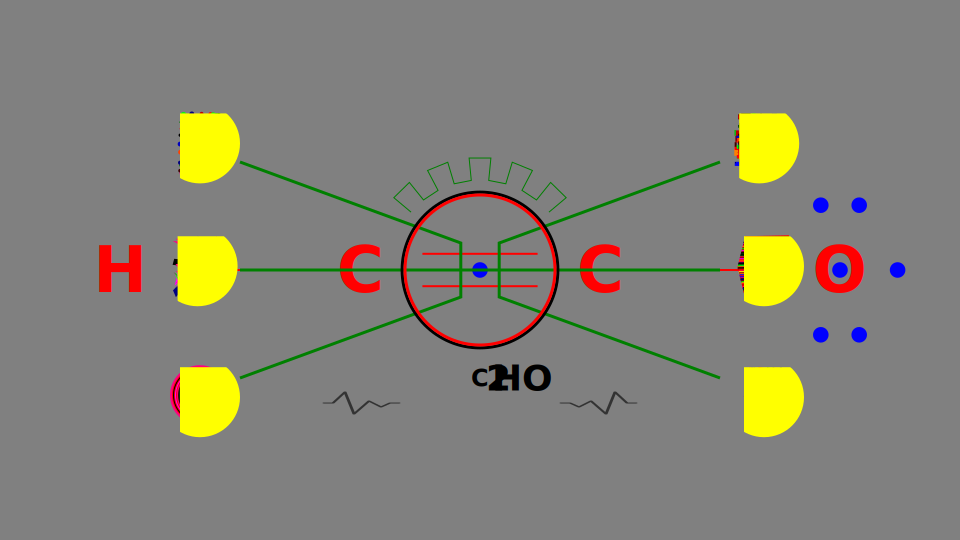

In [216]:
width = 480 * 2
height = 270 * 2

#SVG starting construction

SVG = '<?xml version="1.0" encoding="utf-8"?>\n'
SVG += '<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n'
SVG += f'<svg id="image" width="{width}px" height="{height}px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">'

SVG += '<rect x="0" y="0" width="100%" height="100%" style="fill:gray" /> \n'

#center circle
SVG += '<circle cx="50%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" />'

#************C2HO text 

textOffset_x = 12.5
textStep_x = 100*0.25
text = ['H', 'C', 'C', 'O']
for i in range(4):
    SVG += '<text x="'+ str(textOffset_x + i * textStep_x) +'%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-weight="bold">'+text[i]+'</text>'
    #SVG += '  <rect id="BG" width="100%" height="100%" fill="url(#BG-grad2)" style="mix-blend-mode: screen;" opacity="1" />\n\n'

#Lines
lineOffset = 19
lineLenght = 12
lineHeight = 3
SVG += '<line x1="'+ str(lineOffset + 0 * textStep_x) +'%" y1="50%" x2="'+ str(lineOffset + 0 * textStep_x + lineLenght) +'%" y2="50%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 1 * textStep_x) +'%" y1="50%" x2="'+ str(lineOffset + 1 * textStep_x + lineLenght) +'%" y2="50%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 1 * textStep_x) +'%" y1="' + str(50 - lineHeight) + '%" x2="'+ str(lineOffset + 1 * textStep_x + lineLenght) +'%" y2="' + str(50 - lineHeight) + '%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 1 * textStep_x) +'%" y1="' + str(50 + lineHeight) + '%" x2="'+ str(lineOffset + 1 * textStep_x + lineLenght) +'%" y2="' + str(50 + lineHeight) + '%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 2 * textStep_x) +'%" y1="50%" x2="'+ str(lineOffset + 2 * textStep_x + lineLenght) +'%" y2="50%" style="stroke:rgb(255,0,0);stroke-width:2" />'

#Circles in O
#--Center in O for guidance
centerRef_circles = textOffset_x + 3 * textStep_x
SVG += '<circle cx="'+ str(centerRef_circles) +'%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" />'

sep_x_circles = 2
offset_y_circles = 12
dirs_circles = [[-1, -1], [1, -1], [-1, 1], [1, 1]]
for i in range(4):
    SVG += '<circle cx="'+ str(centerRef_circles + dirs_circles[i][0] * sep_x_circles) +'%" cy="' + str(50 + dirs_circles[i][1] * offset_y_circles) + '%" r="1%" stroke="black" stroke-width="0" fill="blue" />'
SVG += '<circle cx="'+ str(centerRef_circles + sep_x_circles * 3) +'%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" />'


#************ C2HO Logo *************

    
#************paths
side_x = 25
side_y = 30
middle_x = 48
middle_y = 45
#path left
SVG += ('<path d="M'+perc2pixels_x(side_x)+' '+perc2pixels_y(side_y)+' L'+perc2pixels_x(middle_x)+' '+perc2pixels_y(middle_y) +
        ' L' + perc2pixels_x(middle_x) + ' '+perc2pixels_y( 100 - middle_y) + ' L' + perc2pixels_x(side_x) + ' '+perc2pixels_y(100 -side_y) +
        '" stroke="green" stroke-width="3" fill="none"/>')
#path right
SVG += ('<path d="M'+perc2pixels_x(100 - side_x)+' '+perc2pixels_y(side_y)+' L'+perc2pixels_x(100 - middle_x)+' '+perc2pixels_y(middle_y) +
        ' L' + perc2pixels_x(100 - middle_x) + ' '+perc2pixels_y( 100 - middle_y) + ' L' + perc2pixels_x(100 - side_x) + ' '+perc2pixels_y(100 -side_y) +
        '" stroke="green" stroke-width="3" fill="none"/>')

#path middle
SVG += ('<path d="M'+perc2pixels_x(side_x)+' '+perc2pixels_y(50)+' L'+perc2pixels_x(100 - side_x)+' '+perc2pixels_y(50) +
        '" stroke="green" stroke-width="3" fill="none"/>')

#Circle tower
SVG += '<circle cx="50%" cy="50%" r="10%" stroke="black" stroke-width="3" fill="none" />'

SVG += '<circle cx="50%" cy="50%" r="'+str(avg_perc(10))+'" stroke="red" stroke-width="3" fill="none" />'

#OSLO logo
#SVG +=  '<path class="SamplePath" d="M100,200 C100,100 250,100 250,200" stroke="black" stroke-width="3" fill="none" />'
path_tower = spike_arc()

SVG += path_tower

# Text logo
SVG += ('<text x="50%" y="70%" text-anchor="middle" alignment-baseline="central" font-size="1.5em" font-family="cursive" font-weight="bold">' +
        'C<tspan baseline-shift="sub">2</tspan>HO</text>')

#Sound wave
#https://fontawesomeicons.com/svg/icons/electric-wave
SVG += ('<path d="M12 25H15L19 14L22 36L27 23L31 29L34 25H37" stroke="#333"' +
        ' transform="translate('+perc2pixels_x(30)+' '+perc2pixels_y(70)+') scale(3 1)"'+
        ' stroke-width="1" stroke-linecap="round" stroke-linejoin="round" fill="none"/>')

#SVG += '<line x1="47%" y1="79.25%" x2="53%" y2="79.25%" stroke="#333" stroke-width="1" />'

SVG += ('<path d="M12 25H15L19 14L22 36L27 23L31 29L34 25H37" stroke="#333"' +
        ' transform="translate('+perc2pixels_x(70)+' '+perc2pixels_y(70)+') scale(-3 1)"'+
        ' stroke-width="1" stroke-linecap="round" stroke-linejoin="round" fill="none"/>')

####### Six points ###########

#*****************Visual 
id = 'visual'
p_x =  perc2pixels_x(18.75)
p_y =  perc2pixels_y(21)
begin_anim = 0.25
mask_path = ('<path d="M 10 10 C 20 0, 30 0, 40 10 S 30 20, 30 30 S 50 40, 40 50 S 20 60, 10 50 S 0 40, 0 30 S 0 20, 10 10 Z" stroke="black" stroke-width="1" fill="black" >'+
             ' <animateTransform attributeType="xml" attributeName="transform" type="rotate" values="-10 30 45;10 30 65;-10 30 45" dur="3s" additive="sum" repeatCount="indefinite" /> '+
             ' </path>')
# random color cirles
figure_svg = ""
for i in range(300):
    figure_svg += '<circle cx="'+str(rnd.random() * 40)+'" cy="'+str(rnd.random() * 60)+'" r="'+str(rnd.random() * 3)+'" fill="rgb'+str(GenerateColor())+'" />'
SVG += item_network(id, p_x, p_y, mask_path, figure_svg, begin_anim)


#*****************Computing

id = 'comp'
p_x =  perc2pixels_x(77)
p_y =  perc2pixels_y(21)
begin_anim = 0.5
mask_path = spike_arc(ra = 30, ra_factor = 15, arc_degree = 360, n_points = 50, random_factor = 2, center_x = 45, center_y = 62, use_pixels = True)
mask_path = mask_path.replace('fill="none"', 'fill="black" transform="scale(0.45 0.45)"')
mask_path = mask_path.replace('/>', '> <animateTransform attributeType="xml" attributeName="transform" type="rotate" values="0 45 65;360 45 62;0 45 65" dur="15s" additive="sum" repeatCount="indefinite" /> </path>')
# random color squares
figure_svg = ""
for i in range(300):
    figure_svg += '<rect x="'+str(rnd.random() * 45 - 5)+'" y="'+str(rnd.random() * 50)+'" width="'+str(rnd.random() * 10)+'" height="'+str(rnd.random() * 10)+'" fill="rgb'+str(GenerateColor())+'" />'
SVG += item_network(id, p_x, p_y, mask_path, figure_svg, begin_anim)


#*****************Knowledge

id = 'know'
p_x =  perc2pixels_x(77.5)
p_y =  perc2pixels_y(43.75)
begin_anim = 0.75
mask_path = '<path transform="translate(-15 -10) scale(0.9, 0.9)" d="M 20 20 C 30 10, 30 10, 40 10 S 50 10, 60 20 S 70 30, 70 40 S 70 50, 60 60 S 30 70, 20 60 S 10 50, 10 40 Z" stroke="black" stroke-width="1" fill="black" />'
mask_path += '<path transform="translate(-15 -10) scale(0.9, 0.9)" d="M 30 60 L 50 60, 20 80 Z" stroke="black" stroke-width="1" fill="black" />'
#Colors

# Horizontal colored lines
figure_svg = ""
n_lines = 60
inc_step = 0.25
for i in range(n_lines):    
    start_x = 1
    end_x = 45
    if i < n_lines *0.5:
        start_x -= i * inc_step
        end_x += i * inc_step
    else:
        start_x -= (n_lines - i) * inc_step
        end_x += (n_lines - i) * inc_step
    figure_svg += '<line x1="'+str(start_x)+'" y1="'+str(i + 1) +'" x2="'+str(end_x)+'"  y2="'+str(i)+'" style="stroke:rgb'+str(GenerateColor())+';stroke-width:2" />'

#Engranaje
figure_svg1 = spike_arc(ra = 15, ra_factor = 5, arc_degree = 360, n_points = 11, random_factor = 0, center_x = 22, center_y = 25, use_pixels = True)
figure_svg1 = figure_svg1.replace('fill="none"', 'fill="orange" transform="scale(1 1)"')
figure_svg1 = figure_svg1.replace('/>', '> <animateTransform attributeType="xml" attributeName="transform" type="rotate" values="0 22 25;360 22 25" dur="15s" repeatCount="indefinite" /> </path>')
figure_svg2 = spike_arc(ra = 7.5, ra_factor = 3.5, arc_degree = 360, n_points = 11, random_factor = 0, center_x = 22, center_y = 25, use_pixels = True)
figure_svg2 = figure_svg2.replace('fill="none"', 'fill="green" transform="scale(1 1)"')
figure_svg1 += figure_svg2.replace('/>', '> <animateTransform attributeType="xml" attributeName="transform" type="rotate" values="0 22 25;-360 22 25" dur="10s" repeatCount="indefinite" /> </path>')
figure_svg  += figure_svg1

SVG += item_network(id, p_x, p_y, mask_path, figure_svg, begin_anim)

#*****************Learn

id = 'learn'
p_x =  perc2pixels_x(77.5)
p_y =  perc2pixels_y(68)
begin_anim = 1

mask_path = spiral_svg()
# random colored lines
figure_svg = ""
for i in range(100):    
    figure_svg += '<line x1="'+str(rnd.random() * 45)+'" y1="'+str(rnd.random() * 45) +'" x2="'+str(rnd.random() * 50)+'"  y2="'+str(rnd.random() * 50)+'" style="stroke:rgb'+str(GenerateColor())+';stroke-width:2" />'

SVG += item_network(id, p_x, p_y, mask_path, figure_svg, begin_anim)

#*****************Curious

id = 'curious'
p_x =  perc2pixels_x(18.75)
p_y =  perc2pixels_y(68)
begin_anim = 1.25
mask_path = '<g id="c0" transform="translate(3 10)"> <g id="c" transform="translate(3 4)"> <path transform="translate(-17 -8) scale(0.9, 0.9)" d="M 0 40 C 10 30, 30 20, 40 20 S 70 30, 80 40 S 50 60, 40 60 S 10 50, 0 40 " stroke="black" stroke-width="1" fill="black" />'
mask_path += '<animateTransform attributeType="xml" attributeName="transform" type="scale" values="0.9 0.9;0.9 0.4;0.9 0.9" dur="5s" repeatCount="indefinite" /> </g> </g>'
# random colored circles
figure_svg = ""
for i in range(30):  
    figure_svg += '<circle cx="20" cy="28" r="'+str(i)+'" stroke="rgb'+str(GenerateColor())+'" stroke-width="2" fill="none" >'
    figure_svg += '<animateMotion dur="5s" repeatCount="indefinite" path="M8,0 L-8,0 z" /> </circle>'

SVG += item_network(id, p_x, p_y, mask_path, figure_svg, begin_anim)


#*****************research

id = 'research'
p_x =  perc2pixels_x(18.5)
p_y =  perc2pixels_y(43.75)
begin_anim = 1.5
mask_path1 = puzzle_svg()
mask_path1 = mask_path1.replace('fill="black"', 'fill="black" transform="translate(0 -5) scale(0.07 0.07) rotate(25)"')
mask_path1 = mask_path1.replace('/>', '> <animateMotion dur="10s" repeatCount="indefinite" path="M0,0 L20,30 z" /> </path>')
mask_path2 = puzzle_svg()
mask_path2 = mask_path2.replace('fill="black"', 'fill="black" transform="translate(45 -5) scale(0.07 0.07) rotate(65)"')
mask_path2 = mask_path2.replace('/>', '> <animateMotion dur="10s" repeatCount="indefinite" path="M0,0 L-20,0 z" /> </path>')
mask_path3 = puzzle_svg()
mask_path3 = mask_path3.replace('fill="black"', 'fill="black" transform="translate(10 25) scale(0.07 0.07) rotate(10)"')
mask_path3 = mask_path3.replace('/>', '> <animateMotion dur="10s" repeatCount="indefinite" path="M8,2 L-8,2 z" /> </path>')
mask_path = mask_path1 + mask_path2 + mask_path3
# random colored polygons
figure_svg = ""
random_limit =25
for i in range(50):  
    figure_svg += '<polygon transform="translate('+str(rnd.random() * 40 - 10)+' '+str(rnd.random() * 45- 2)+')" points="'+str(rnd.random() * random_limit)+','+str(rnd.random() * random_limit)+' '+str(rnd.random() * random_limit)+','+str(rnd.random() * random_limit)+' '+str(rnd.random() * random_limit)+','+str(rnd.random() * random_limit)+' '+str(rnd.random() * random_limit)+','+str(rnd.random() * random_limit)+' '+str(rnd.random() * random_limit)+','+str(rnd.random() * random_limit)+'" fill="rgb'+str(GenerateColor())+'" />'

SVG += item_network(id, p_x, p_y, mask_path, figure_svg, begin_anim)




SVG += '</svg>\n'
#print(SVG)
#print(path)
ipd.display(ipd.SVG(SVG))

In [128]:
#print(SVG)

In [127]:
#ipd.display(ipd.SVG(SVG))